# Import

In [1]:
import os
import numpy as np
import pandas as pd
import spacy

import matplotlib.pyplot as plt
import seaborn as sns

sns.set
%matplotlib inline

# Load the dataset

Head
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
_____________________________________________________________________________
Shape
(10000, 2)
_____________________________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
review       10000 non-null object
sentiment    10000 non-null object
dtypes: object(2)
memory usage: 156.4+ KB
None


,review,sentiment
count,10000,10000
unique,9983,2
top,"So, I'm wondering while watching this film, di...",positive
freq,2,5028


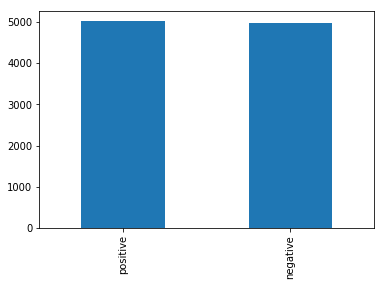

In [2]:
imdb_data=pd.read_csv('IMDBDataset.csv')

df_train=imdb_data[:10000]

print("Head")
print(df_train.head())
print("_____________________________________________________________________________")
print("Shape")
print(df_train.shape)
print("_____________________________________________________________________________")
print(df_train.info())

df_train['sentiment'].value_counts().plot(kind='bar');
df_train.describe()

The data is clean, there is no Naan values

# Preprocessing

## Tokenizing

Creation of a tokenize's function permitting to automatically tokenize our train and test set

In [3]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

def tokenize(data):
    corpus = [word_tokenize(token) for token in data]
    lowercase_train = [[token.lower() for token in doc] for doc in corpus]
    alphas = [[token for token in doc if token.isalpha()] for doc in lowercase_train]
    stop_words = stopwords.words('english')
    train_no_stop = [[token for token in doc if token not in stop_words] for doc in alphas]
    stemmer = PorterStemmer()
    stemmed = [[stemmer.stem(token) for token in doc] for doc in train_no_stop]
    train_clean_str = [ ' '.join(doc) for doc in stemmed]
    return train_clean_str

In [4]:
X_train=imdb_data.review[:2000]
y_train=imdb_data.sentiment[:2000]

X_train = tokenize(X_train)

X_test2=imdb_data.review[40000:45000]
y_test2=imdb_data.sentiment[40000:45000]

X_test2 = tokenize(X_test2)
y_test2 = y_test2.values.tolist()

X_train[1]

'wonder littl product br br film techniqu fashion give comfort sometim discomfort sens realism entir piec br br actor extrem well michael sheen got polari voic pat truli see seamless edit guid refer william diari entri well worth watch terrificli written perform piec master product one great master comedi life br br realism realli come home littl thing fantasi guard rather use tradit techniqu remain solid disappear play knowledg sens particularli scene concern orton halliwel set particularli flat halliwel mural decor everi surfac terribl well done'

# Machine Learning

## Preprocessing

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

cvec = CountVectorizer(stop_words='english')

## Machine learning models

### MultinomialNB

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
pipe = Pipeline([('vectorizer', cvec), ('mnb', mnb)])

y_train=y_train.values.tolist()
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_train)

In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report


cm = confusion_matrix(y_train, y_pred)
accuracy = accuracy_score(y_pred, y_train)

cv = cross_val_score(pipe, X_train, y_train, scoring='f1_macro', cv=5, ).mean()
cr = classification_report(y_train, y_pred)
print(cm)
print("Accuracy :" , accuracy)
print(cr, cv)

[[990   5]
 [ 59 946]]
Accuracy : 0.968
              precision    recall  f1-score   support

    negative       0.94      0.99      0.97       995
    positive       0.99      0.94      0.97      1005

   micro avg       0.97      0.97      0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000
 0.809793093779436


# Semi Supervised 

In [8]:
iterasi=1
acc_train=[]
acc_test=[]
acc_test2=[]

seed=1.10
data_total=len(X_train)
data_iter=int(seed*data_total)

In [9]:

print(data_total)
print(data_iter)


y_pred_fromtrain=pipe.predict(X_train)
cv = cross_val_score(pipe, X_train, y_train, scoring='f1_macro', cv=5, ).mean()
cr = classification_report(y_pred_fromtrain, y_train)
cm = confusion_matrix(y_train, y_pred_fromtrain)
accuracy = accuracy_score(y_pred_fromtrain, y_train)
acc_train.append(accuracy)
print("\nTrain Data=",len(X_train),len(y_train))
print("Predicton from train data model ke-",iterasi)
print("\nCross validation score:",cv,"\n",cr)
print("\nConfusion Matrix : \n",cm)
print("Accuracy :" , accuracy)
print("__________________________________________________________________________________________________")


X_test=imdb_data.review[data_total:data_iter]
y_test=imdb_data.sentiment[data_total:data_iter]

pipe.fit(X_train,y_train)

print("Train Data=",len(X_train),len(y_train))
print("Test Data=",len(X_test),len(y_test))

y_test=y_test.values.tolist()
X_test=tokenize(X_test)
y_pred=pipe.predict(X_test)

cr = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_pred, y_test)
acc_test.append(accuracy)
print("prediction from test data, model ke-",iterasi)
print(cr)
print("\nConfusion Matrix : \n",cm)
print("Accuracy :" , accuracy)
print("__________________________________________________________________________________________________")

y_pred_fromtest2=pipe.predict(X_test2)
cr = classification_report(y_test2, y_pred_fromtest2)
cm = confusion_matrix(y_test2, y_pred_fromtest2)
accuracy = accuracy_score(y_pred_fromtest2, y_test2)
acc_test2.append(accuracy)
print("prediction from test data, model ke-",iterasi)
print(cr)
print("\nConfusion Matrix : \n",cm)
print("Accuracy :" , accuracy)
print("__________________________________________________________________________________________________")





iterasi=iterasi+1


prob=pipe.predict_proba(X_test)

for data in range (0,len(X_test)) :

    if (prob[data][0]) > 0.999999 :
        X=X_test[data]
        y=y_pred[data]
        X_train.append(X)
        y_train.append('negative')
    if (prob[data][1]) > 0.999999 :
        X=X_test[data]
        y=y_pred[data]
        X_train.append(X)
        y_train.append('positive')
    elif (prob[data][0]) < 0.9 :
        X=X_test[data]
        y=y_pred[data]
        X_train.append(X)
        y_train.append('positive')
    elif (prob[data][1]) < 0.9 :
        X=X_test[data]
        y=y_pred[data]
        X_train.append(X)
        y_train.append('negative')
        
    

print(len(X_train),len(y_train))

data_total=data_iter
data_iter=int(seed*data_total)

2000
2200

Train Data= 2000 2000
Predicton from train data model ke- 1

Cross validation score: 0.809793093779436 
               precision    recall  f1-score   support

    negative       0.99      0.94      0.97      1049
    positive       0.94      0.99      0.97       951

   micro avg       0.97      0.97      0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000


Confusion Matrix : 
 [[990   5]
 [ 59 946]]
Accuracy : 0.968
__________________________________________________________________________________________________
Train Data= 2000 2000
Test Data= 200 200
prediction from test data, model ke- 1
              precision    recall  f1-score   support

    negative       0.77      0.82      0.80        88
    positive       0.85      0.81      0.83       112

   micro avg       0.81      0.81      0.81       200
   macro avg       0.81      0.82      0.81       200
weighted avg       0.82      0.81      0.82 

In [10]:
while data_total < 10000 :

    print(data_total,data_iter,len(X_train))


    y_pred_fromtrain=pipe.predict(X_train)
    cv = cross_val_score(pipe, X_train, y_train, scoring='f1_macro', cv=5, ).mean()
    cr = classification_report(y_pred_fromtrain, y_train)
    cm = confusion_matrix(y_train, y_pred_fromtrain)
    accuracy = accuracy_score(y_pred_fromtrain, y_train)
    acc_train.append(accuracy)
    print("\nTrain Data=",len(X_train),len(y_train))
    print("Predicton from train data model ke-",iterasi)
    print("\nCross validation score:",cv,"\n",cr)
    print("\nConfusion Matrix : \n",cm)
    print("Accuracy :" , accuracy)
    print("__________________________________________________________________________________________________")


    X_test=imdb_data.review[data_total:data_iter]
    y_test=imdb_data.sentiment[data_total:data_iter]

    pipe.fit(X_train,y_train)

    print("Train Data=",len(X_train),len(y_train))
    print("Test Data=",len(X_test),len(y_test))

    y_test=y_test.values.tolist()
    X_test=tokenize(X_test)
    y_pred=pipe.predict(X_test)

    cr = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_pred, y_test)
    acc_test.append(accuracy)
    print("prediction from test data, model ke-",iterasi)
    print(cr)
    print("\nConfusion Matrix : \n",cm)
    print("Accuracy :" , accuracy)
    print("__________________________________________________________________________________________________")
    
    y_pred_fromtest2=pipe.predict(X_test2)
    cr = classification_report(y_test2, y_pred_fromtest2)
    cm = confusion_matrix(y_test2, y_pred_fromtest2)
    accuracy = accuracy_score(y_pred_fromtest2, y_test2)
    acc_test2.append(accuracy)
    print("prediction from test data, model ke-",iterasi)
    print(cr)
    print("\nConfusion Matrix : \n",cm)
    print("Accuracy :" , accuracy)
    print("__________________________________________________________________________________________________")





    iterasi=iterasi+1


    prob=pipe.predict_proba(X_test)

    for data in range (0,len(X_test)) :
         if (data_total+data) < 10000:
                
                if (prob[data][0]) > 0.999999 :
                    X=X_test[data]
                    y=y_pred[data]
                    X_train.append(X)
                    y_train.append('negative')
                if (prob[data][1]) > 0.999999 :
                    X=X_test[data]
                    y=y_pred[data]
                    X_train.append(X)
                    y_train.append('positive')
                elif (prob[data][0]) < 0.9 :
                    X=X_test[data]
                    y=y_pred[data]
                    X_train.append(X)
                    y_train.append('positive')
                elif (prob[data][1]) < 0.9 :
                    X=X_test[data]
                    y=y_pred[data]
                    X_train.append(X)
                    y_train.append('negative')


            


    print(len(X_train),len(y_train))
    
    data_total=data_iter
    data_iter=int(seed*data_total)

2200 2420 2237

Train Data= 2237 2237
Predicton from train data model ke- 2

Cross validation score: 0.8214460326645874 
               precision    recall  f1-score   support

    negative       1.00      0.94      0.97      1179
    positive       0.94      1.00      0.96      1058

   micro avg       0.97      0.97      0.97      2237
   macro avg       0.97      0.97      0.97      2237
weighted avg       0.97      0.97      0.97      2237


Confusion Matrix : 
 [[1107    5]
 [  72 1053]]
Accuracy : 0.965578900312919
__________________________________________________________________________________________________
Train Data= 2237 2237
Test Data= 220 220
prediction from test data, model ke- 2
              precision    recall  f1-score   support

    negative       0.80      0.82      0.81       111
    positive       0.81      0.79      0.80       109

   micro avg       0.80      0.80      0.80       220
   macro avg       0.80      0.80      0.80       220
weighted avg       0.8

prediction from test data, model ke- 6
              precision    recall  f1-score   support

    negative       0.78      0.80      0.79      2463
    positive       0.80      0.78      0.79      2537

   micro avg       0.79      0.79      0.79      5000
   macro avg       0.79      0.79      0.79      5000
weighted avg       0.79      0.79      0.79      5000


Confusion Matrix : 
 [[1975  488]
 [ 558 1979]]
Accuracy : 0.7908
__________________________________________________________________________________________________
3856 3856
3542 3896 3856

Train Data= 3856 3856
Predicton from train data model ke- 7

Cross validation score: 0.8655650436426858 
               precision    recall  f1-score   support

    negative       0.99      0.93      0.96      2114
    positive       0.92      0.98      0.95      1742

   micro avg       0.96      0.96      0.96      3856
   macro avg       0.95      0.96      0.96      3856
weighted avg       0.96      0.96      0.96      3856


Confusio

prediction from test data, model ke- 11
              precision    recall  f1-score   support

    negative       0.79      0.78      0.78       267
    positive       0.77      0.77      0.77       251

   micro avg       0.78      0.78      0.78       518
   macro avg       0.78      0.78      0.78       518
weighted avg       0.78      0.78      0.78       518


Confusion Matrix : 
 [[209  58]
 [ 57 194]]
Accuracy : 0.777992277992278
__________________________________________________________________________________________________
prediction from test data, model ke- 11
              precision    recall  f1-score   support

    negative       0.77      0.78      0.77      2463
    positive       0.78      0.77      0.78      2537

   micro avg       0.78      0.78      0.78      5000
   macro avg       0.78      0.78      0.78      5000
weighted avg       0.78      0.78      0.78      5000


Confusion Matrix : 
 [[1920  543]
 [ 577 1960]]
Accuracy : 0.776
___________________________

Train Data= 9759 9759
Test Data= 834 834
prediction from test data, model ke- 16
              precision    recall  f1-score   support

    negative       0.74      0.76      0.75       414
    positive       0.76      0.74      0.75       420

   micro avg       0.75      0.75      0.75       834
   macro avg       0.75      0.75      0.75       834
weighted avg       0.75      0.75      0.75       834


Confusion Matrix : 
 [[315  99]
 [109 311]]
Accuracy : 0.750599520383693
__________________________________________________________________________________________________
prediction from test data, model ke- 16
              precision    recall  f1-score   support

    negative       0.76      0.76      0.76      2463
    positive       0.77      0.77      0.77      2537

   micro avg       0.76      0.76      0.76      5000
   macro avg       0.76      0.76      0.76      5000
weighted avg       0.76      0.76      0.76      5000


Confusion Matrix : 
 [[1880  583]
 [ 595 1942]]
Acc

In [14]:
print("Fnal Model")

pipe.fit(X_train,y_train)

y_pred_fromtest2=pipe.predict(X_test2)
cr = classification_report(y_test2, y_pred_fromtest2)
cm = confusion_matrix(y_test2, y_pred_fromtest2)
accuracy = accuracy_score(y_pred_fromtest2, y_test2)
acc_test2.append(accuracy)
print("prediction from test data, model ke-",iterasi)
print(cr)
print("\nConfusion Matrix : \n",cm)
print("Accuracy :" , accuracy)
print("__________________________________________________________________________________________________")





len(X_train)

Fnal Model
prediction from test data, model ke- 18
              precision    recall  f1-score   support

    negative       0.76      0.76      0.76      2463
    positive       0.77      0.77      0.77      2537

   micro avg       0.76      0.76      0.76      5000
   macro avg       0.76      0.76      0.76      5000
weighted avg       0.76      0.76      0.76      5000


Confusion Matrix : 
 [[1866  597]
 [ 593 1944]]
Accuracy : 0.762
__________________________________________________________________________________________________


11789

# Test

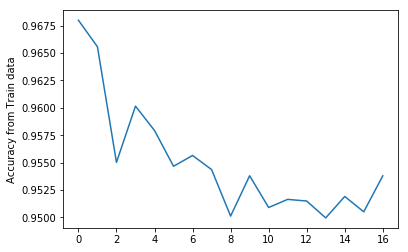

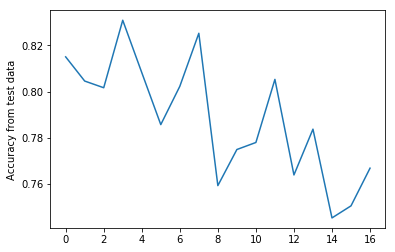

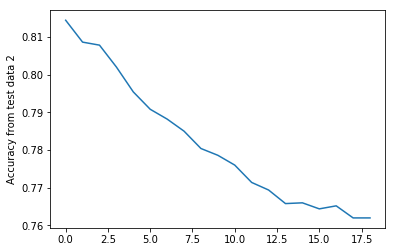

In [15]:
plt.plot(acc_train)
plt.ylabel('Accuracy from Train data')
plt.show()

plt.plot(acc_test)
plt.ylabel('Accuracy from test data')
plt.show()

plt.plot(acc_test2)
plt.ylabel('Accuracy from test data 2')
plt.show()

In [13]:
len(X_train)

11789